In [ ]:
# Base
# -----------------------------------
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import os

# Hypothesis Testing
# -----------------------------------
from scipy.stats import shapiro
import scipy.stats as stats

# Configuration
# -----------------------------------
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)

pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:.4f}'.format

In [ ]:
ab= pd.read_csv("/content/cookie_cats.csv")

In [ ]:
ab.head(5)

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


In [ ]:
ab.describe()

,userid,sum_gamerounds
count,90189.0000,90189.0000
mean,4998412.2345,51.8725
std,2883285.6077,195.0509
min,116.0000,0.0000
25%,2512230.0000,5.0000
50%,4995815.0000,16.0000
75%,7496452.0000,51.0000
max,9999861.0000,49854.0000


In [ ]:
ab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90189 entries, 0 to 90188
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   userid          90189 non-null  int64 
 1   version         90189 non-null  object
 2   sum_gamerounds  90189 non-null  int64 
 3   retention_1     90189 non-null  bool  
 4   retention_7     90189 non-null  bool  
dtypes: bool(2), int64(2), object(1)
memory usage: 2.2+ MB


In [ ]:
# Number of Unique User
ab.userid.nunique() == ab.shape[0]

True

In [ ]:
# Summary Stats: sum_gamerounds
ab.describe([0.01, 0.05, 0.10, 0.20, 0.80, 0.90, 0.95, 0.99])[["sum_gamerounds"]].T


,count,mean,std,min,1%,5%,10%,20%,50%,80%,90%,95%,99%,max
sum_gamerounds,90189.0000,51.8725,195.0509,0.0000,0.0000,1.0000,1.0000,3.0000,16.0000,67.0000,134.0000,221.0000,493.0000,49854.0000


In [ ]:
ab.groupby("version").sum_gamerounds.agg(["count", "median", "mean", "std", "max"])


,count,median,mean,std,max
version,,,,,
gate_30,44700,17,52.4563,256.7164,49854
gate_40,45489,16,51.2988,103.2944,2640


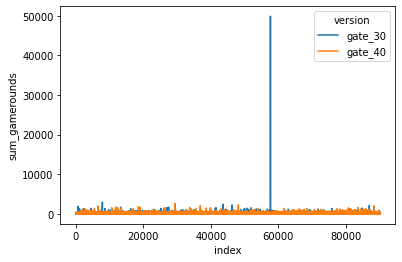

In [ ]:
sns.lineplot(data= ab.reset_index(), x="index",y="sum_gamerounds" ,hue="version")


In [ ]:
ab = ab[ab.sum_gamerounds < ab.sum_gamerounds.max()]

# Summary Stats: sum_gamerounds
ab.describe([0.01, 0.05, 0.10, 0.20, 0.80, 0.90, 0.95, 0.99])[["sum_gamerounds"]].T

,count,mean,std,min,1%,5%,10%,20%,50%,80%,90%,95%,99%,max
sum_gamerounds,90188.0000,51.3203,102.6827,0.0000,0.0000,1.0000,1.0000,3.0000,16.0000,67.0000,134.0000,221.0000,493.0000,2961.0000


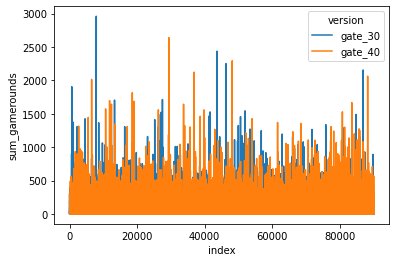

In [ ]:
#After removing outliers
sns.lineplot(data= ab.reset_index(), x="index",y="sum_gamerounds" ,hue="version")


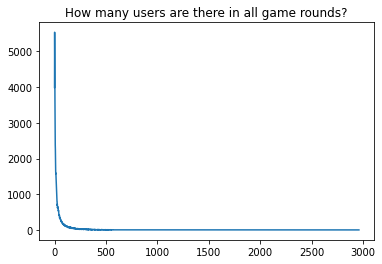

In [ ]:
sns.lineplot(x=ab['sum_gamerounds'].value_counts().index, y = ab['sum_gamerounds'].value_counts().values)
plt.title("How many users are there in all game rounds?")
plt.show()


In [ ]:
ab.groupby("sum_gamerounds").userid.count().reset_index().head(20)

,sum_gamerounds,userid
0,0,3994
1,1,5538
2,2,4606
3,3,3958
4,4,3629
5,5,2992
6,6,2861
7,7,2379
8,8,2267
9,9,2013


In [ ]:

# How many users reached gate 30 & gate 40 levels?
ab.groupby("sum_gamerounds").userid.count().loc[[30,40]]

sum_gamerounds
30    642
40    505
Name: userid, dtype: int64

In [ ]:
# A/B Groups & Target Summary Stats
ab.groupby("version").sum_gamerounds.agg(["count", "median", "mean", "std", "max"])

,count,median,mean,std,max
version,,,,,
gate_30,44699,17,51.3421,102.0576,2961
gate_40,45489,16,51.2988,103.2944,2640


In [ ]:
ab.groupby(["version", "retention_1"]).sum_gamerounds.agg(["count", "median", "mean", "std", "max"])

count  median    mean      std   max
version retention_1                                      
gate_30 False        24665       6 16.3591  36.5284  1072
        True         20034      48 94.4117 135.0377  2961
gate_40 False        25370       6 16.3404  35.9258  1241
        True         20119      49 95.3812 137.8873  2640

In [ ]:
ab.groupby(["version", "retention_7"]).sum_gamerounds.agg(["count", "median", "mean", "std", "max"])

count  median     mean      std   max
version retention_7                                       
gate_30 False        36198      11  25.7965  43.3162   981
        True          8501     105 160.1175 179.3586  2961
gate_40 False        37210      11  25.8564  44.4061  2640
        True          8279     111 165.6498 183.7925  2294

In [ ]:

ab["Retention"] = np.where((ab.retention_1 == True) & (ab.retention_7 == True), 1,0)
ab.groupby(["version", "Retention"])["sum_gamerounds"].agg(["count", "median", "mean", "std", "max"])

count  median     mean      std   max
version Retention                                       
gate_30 0          38023      12  28.0703  48.0175  1072
        1           6676     127 183.8863 189.6264  2961
gate_40 0          38983      12  28.1034  48.9278  2640
        1           6506     133 190.2824 194.2201  2294

In [ ]:
ab["NewRetention"] = list(map(lambda x,y: str(x)+"-"+str(y), ab.retention_1, ab.retention_7))
ab.groupby(["version", "NewRetention"]).sum_gamerounds.agg(["count", "median", "mean", "std", "max"]).reset_index()

,version,NewRetention,count,median,mean,std,max
0,gate_30,False-False,22840,6,11.8197,21.6426,981
1,gate_30,False-True,1825,43,73.1693,93.2223,1072
2,gate_30,True-False,13358,33,49.6945,58.1254,918
3,gate_30,True-True,6676,127,183.8863,189.6264,2961
4,gate_40,False-False,23597,6,11.9133,20.9010,547
5,gate_40,False-True,1773,47,75.2611,94.4780,1241
6,gate_40,True-False,13613,32,50.0255,60.9246,2640
7,gate_40,True-True,6506,133,190.2824,194.2201,2294


<b>A/B Testing </b><br>
Assumptions:
<li>Check normality
<li>If Normal Distribution, check homogeneity

In [ ]:
# Create cross table: retention grouped by version
crossed_1 = pd.crosstab(ab.version, ab.retention_1)
crossed_1

retention_1,False,True
version,,
gate_30,24665,20034
gate_40,25370,20119


In [ ]:
# Create cross table of retention_7 grouped by version
crossdata = pd.crosstab(ab.version, ab.retention_7)
crossdata

retention_7,False,True
version,,
gate_30,36198,8501
gate_40,37210,8279


In [ ]:
# Import libraries for chi-square test
import numpy as np
import scipy as sp
import scipy.stats

In [ ]:
# Calculate chi-square,p-value, degree of freedom, and expected
x2, p, dof, expected = sp.stats.chi2_contingency(crossdata,correction=False)

In [ ]:

# Test the hypothesis by chi-square test
print("Chi-square: %(x2)s" %locals() )
print("p-value: %(p)s" %locals() )
print("Degree of freedom: %(dof)s" %locals() )
print(expected)

if p < 0.01:
    print("Significant at 1% level of significance")
elif p < 0.05:
    print("Significant at 5% level of significance")
else:
    print("Not significant at 5% level of significance")

Chi-square: 9.96923845042939
p-value: 0.0015917731773992998
Degree of freedom: 1
[[36382.49203885  8316.50796115]
 [37025.50796115  8463.49203885]]
Significant at 1% level of significance
